In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [22]:
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)

type(boston)

sklearn.utils.Bunch

In [30]:
print(pd.DataFrame(X))

           0     1      2    3       4      5      6        7     8      9   \
0    15.02340   0.0  18.10  0.0  0.6140  5.304   97.3   2.1007  24.0  666.0   
1     5.44114   0.0  18.10  0.0  0.7130  6.655   98.2   2.3552  24.0  666.0   
2     1.00245   0.0   8.14  0.0  0.5380  6.674   87.3   4.2390   4.0  307.0   
3     0.00632  18.0   2.31  0.0  0.5380  6.575   65.2   4.0900   1.0  296.0   
4     0.26169   0.0   9.90  0.0  0.5440  6.023   90.4   2.8340   4.0  304.0   
5     0.05083   0.0   5.19  0.0  0.5150  6.316   38.1   6.4584   5.0  224.0   
6     0.15445  25.0   5.13  0.0  0.4530  6.145   29.2   7.8148   8.0  284.0   
7     3.53501   0.0  19.58  1.0  0.8710  6.152   82.6   1.7455   5.0  403.0   
8     3.67822   0.0  18.10  0.0  0.7700  5.362   96.2   2.1036  24.0  666.0   
9    18.49820   0.0  18.10  0.0  0.6680  4.138  100.0   1.1370  24.0  666.0   
10    1.49632   0.0  19.58  0.0  0.8710  5.404  100.0   1.5916   5.0  403.0   
11    0.14455  12.5   7.87  0.0  0.5240  6.172   96.

In [3]:
X.shape

(506, 13)

In [4]:
X[0]

array([1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
       5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.49480e+02, 2.49100e+01])

In [5]:
X = X.astype(np.float32)
X[0]

array([1.50234e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.14000e-01,
       5.30400e+00, 9.73000e+01, 2.10070e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.49480e+02, 2.49100e+01], dtype=float32)

In [6]:
X.shape[0]

506

In [7]:
offset = int(X.shape[0] * 0.9)
print(offset)

455


In [8]:
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [9]:
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

In [10]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
mse = mean_squared_error(y_train, model.predict(X_train))
print("MSE: {}".format(mse))

MSE: 0.8287883033902729


In [12]:
mse = mean_squared_error(y_test, model.predict(X_test))
print("MSE: {}".format(mse))

MSE: 6.658087737922718


In [13]:
params['n_estimators']

1000

Text(0, 0.5, 'Deviance')

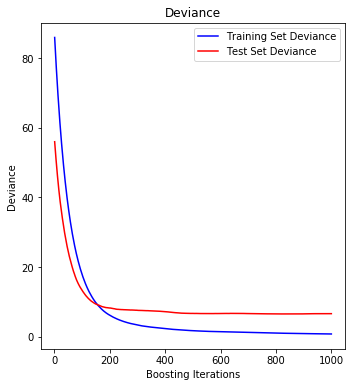

In [14]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

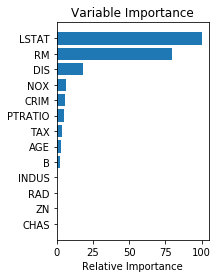

In [15]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()